In [1]:
import pandas as pd
import tabula
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv("./output/2.csv", dtype={"reference_no": object})
df

,datetime,description,reference_no,debit,credit,balance
0,2018-08-27 08:18 AM,GCash Transaction with Ref.no. 2103158263,0002103158263,NaN,3.75,5539.25
1,2018-08-27 08:18 AM,Buy Load transaction for 09975187259,0002103155009,75.0,NaN,5535.50
2,NaN,Send Money from 09975187259 to,NaN,NaN,NaN,NaN
3,2018-08-27 05:12 PM,NaN,0002108470539,3000.0,NaN,2539.25
4,NaN,gcash_atm2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1918,2020-12-06 12:49 AM,Buy Load Transaction for 09975187259,0000778906515,299.0,NaN,1235.94
1919,NaN,"Payment to Food Panda Philippines Inc.,",NaN,NaN,NaN,NaN
1920,2020-12-07 07:33 AM,NaN,0000779138938,314.0,NaN,921.94
1921,NaN,Merchant Transaction Number: t7mq-3vib,NaN,NaN,NaN,NaN


In [5]:
def datetime_merged(row):
    if re.search("^\d{4}-\d{2}-\d{2} \d{2}:\d{2} (?:A|P)M$", str(row['datetime'])):
        return False
    return True

In [6]:
def value_is_nan(value):
    if pd.isnull(value) or (type(value) == list):
        return True
    return False

In [7]:
def split_datetime(df):
    for index, row in df.iterrows():

        match = re.search("^(\d{4}-\d{2}-\d{2} \d{2}:\d{2} (?:A|P)M)\s(.*)", str(row['datetime']))

        if datetime_merged(row) and not value_is_nan(row['datetime']) and match:
            correct_datetime = match[1]
            correct_description = match[2]

            df.at[index, 'reference_no'] = row['description']
            df.at[index, 'description'] = correct_description
            df.at[index, 'datetime'] = correct_datetime

        if datetime_merged(row) and not value_is_nan(row['datetime']):
            df.at[index, 'description'] = row['datetime']
            df.at[index, 'datetime'] = np.NaN

In [8]:
merged_datetime_df = df[~df['datetime'].str.contains('^\d{4}-\d{2}-\d{2} \d{2}:\d{2} (?:A|P)M$', na=False)]
merged_datetime_df

,datetime,description,reference_no,debit,credit,balance
2,NaN,Send Money from 09975187259 to,NaN,NaN,NaN,NaN
4,NaN,gcash_atm2,NaN,NaN,NaN,NaN
9,NaN,Send Money from 09975187259 to,NaN,NaN,NaN,NaN
11,NaN,gcash_atm2,NaN,NaN,NaN,NaN
12,NaN,Transfer from 09975187259 to,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1904,NaN,Rebate from purchasing GoSAKTO70 for,NaN,NaN,NaN,NaN
1906,NaN,09278312071,NaN,NaN,NaN,NaN
1907,NaN,NaN,19467,NaN,NaN,NaN
1919,NaN,"Payment to Food Panda Philippines Inc.,",NaN,NaN,NaN,NaN


In [9]:
split_datetime(df)
df

,datetime,description,reference_no,debit,credit,balance
0,2018-08-27 08:18 AM,GCash Transaction with Ref.no. 2103158263,0002103158263,NaN,3.75,5539.25
1,2018-08-27 08:18 AM,Buy Load transaction for 09975187259,0002103155009,75.0,NaN,5535.50
2,NaN,Send Money from 09975187259 to,NaN,NaN,NaN,NaN
3,2018-08-27 05:12 PM,NaN,0002108470539,3000.0,NaN,2539.25
4,NaN,gcash_atm2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1918,2020-12-06 12:49 AM,Buy Load Transaction for 09975187259,0000778906515,299.0,NaN,1235.94
1919,NaN,"Payment to Food Panda Philippines Inc.,",NaN,NaN,NaN,NaN
1920,2020-12-07 07:33 AM,NaN,0000779138938,314.0,NaN,921.94
1921,NaN,Merchant Transaction Number: t7mq-3vib,NaN,NaN,NaN,NaN


In [10]:
# split rows with combined description
merged_description_filter = df['description'].str.contains('\d{4}-\d{2}-\d{2} \d{2}:\d{2} (?:A|P)M', na=False)
df[merged_description_filter]

,datetime,description,reference_no,debit,credit,balance
1786,NaN,2020-10-14 12:03 PM Transfer from 09975187259 to 09278312071,7000509381238,4000.00,NaN,15992.23
1787,NaN,2020-10-14 02:09 PM Transfer from 09975187259 to 09278312071,7000509723333,3000.00,NaN,12992.23
1788,NaN,2020-10-14 02:19 PM Transfer from 09975187259 to 09278312071,7000509747855,1000.00,NaN,11992.23
1789,NaN,2020-10-19 10:01 AM Transfer from 09975187259 to 09278312071,7000522943824,5000.00,NaN,6992.23
1790,NaN,2020-10-19 10:47 AM Transfer from 09975187259 to 09278312071,7000523077309,20.00,NaN,6972.23
1794,NaN,2020-10-20 07:37 PM GCash Mastercard Payment to FOOD PANDA,7000527129783,458.70,NaN,6265.67
1795,NaN,2020-10-23 04:17 PM GCash Mastercard Payment to FOOD PANDA,7000534449489,529.45,NaN,5736.22
1799,NaN,2020-10-24 11:53 PM Transfer from 09975187259 to 09278312071,7000538293251,2000.00,NaN,3542.22
1800,NaN,2020-10-25 03:01 AM Cash-In via PayPal,7000538381291,NaN,26000.00,0.00
1801,NaN,2020-10-25 02:14 PM Payment to 2C2P Philippines Inc,0000665989347,10044.00,NaN,19498.22


In [11]:
def description_merged(row):
    if re.search("\d{4}-\d{2}-\d{2} \d{2}:\d{2} (?:A|P)M", str(row['description'])):
        return True
    return False

In [12]:
def split_description(df):
    for index, row in df.iterrows():

        match = re.search("(.*)(\d{4}-\d{2}-\d{2} \d{2}:\d{2} (?:A|P)M)\s(.*)", str(row['description']))

        if description_merged(row) and not value_is_nan(row['description']) and match:
            reference_no = match[1]
            datetime = match[2]
            description = match[3]
            
            df.at[index, 'reference_no'] = reference_no
            df.at[index, 'datetime'] = datetime
            df.at[index, 'description'] = description


In [13]:
split_description(df)
df

,datetime,description,reference_no,debit,credit,balance
0,2018-08-27 08:18 AM,GCash Transaction with Ref.no. 2103158263,0002103158263,NaN,3.75,5539.25
1,2018-08-27 08:18 AM,Buy Load transaction for 09975187259,0002103155009,75.0,NaN,5535.50
2,NaN,Send Money from 09975187259 to,NaN,NaN,NaN,NaN
3,2018-08-27 05:12 PM,NaN,0002108470539,3000.0,NaN,2539.25
4,NaN,gcash_atm2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1918,2020-12-06 12:49 AM,Buy Load Transaction for 09975187259,0000778906515,299.0,NaN,1235.94
1919,NaN,"Payment to Food Panda Philippines Inc.,",NaN,NaN,NaN,NaN
1920,2020-12-07 07:33 AM,NaN,0000779138938,314.0,NaN,921.94
1921,NaN,Merchant Transaction Number: t7mq-3vib,NaN,NaN,NaN,NaN


In [14]:
# fix description by merging them and replacing prefix and suffix with NaN
# fix transaction numbers

In [15]:
# df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %I:%M %p')
# df

In [16]:
# df.set_index('datetime')

In [17]:
def fix_description(df):
    for index, row in df.iterrows():
        datetime = row["datetime"]

        try:
            if value_is_nan(datetime):
                prefix = str(df.loc[index]["description"])
                suffix = str(df.loc[index + 2]["description"])

                df.at[index + 1, "description"] = "{} {}".format(prefix, suffix)

                df.drop(index=index, inplace=True)
                df.drop(index=index + 2, inplace=True)
        except KeyError:
            pass
        
#     df.reset_index(inplace=True)
#     df.drop(['index'], axis=1, inplace=True)

In [18]:
# fix_description(df)
df

,datetime,description,reference_no,debit,credit,balance
0,2018-08-27 08:18 AM,GCash Transaction with Ref.no. 2103158263,0002103158263,NaN,3.75,5539.25
1,2018-08-27 08:18 AM,Buy Load transaction for 09975187259,0002103155009,75.0,NaN,5535.50
2,NaN,Send Money from 09975187259 to,NaN,NaN,NaN,NaN
3,2018-08-27 05:12 PM,NaN,0002108470539,3000.0,NaN,2539.25
4,NaN,gcash_atm2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1918,2020-12-06 12:49 AM,Buy Load Transaction for 09975187259,0000778906515,299.0,NaN,1235.94
1919,NaN,"Payment to Food Panda Philippines Inc.,",NaN,NaN,NaN,NaN
1920,2020-12-07 07:33 AM,NaN,0000779138938,314.0,NaN,921.94
1921,NaN,Merchant Transaction Number: t7mq-3vib,NaN,NaN,NaN,NaN


In [19]:
send_to_mama_filter = df['description'].str.contains('to 09954645215', na=False)
df[send_to_mama_filter]

,datetime,description,reference_no,debit,credit,balance
8,2018-08-28 08:04 PM,Transfer from 09975187259 to 09954645215,0002120186698,2000.0,NaN,8994.25
160,2019-03-24 03:01 PM,Transfer from 09975187259 to 09954645215,0000974648205,7000.0,NaN,9503.05
792,2019-11-01 11:07 AM,Transfer from 09975187259 to 09954645215,7000028294489,9000.0,NaN,5363.05
882,2019-11-24 02:47 PM,Transfer from 09975187259 to 09954645215,7000044322938,10000.0,NaN,1287.16
912,2019-12-02 11:36 AM,Transfer from 09975187259 to 09954645215,7000050383214,500.0,NaN,18183.38
1212,2020-02-27 09:22 PM,Transfer from 09975187259 to 09954645215,7000114259257,3000.0,NaN,25.64
1269,2020-03-16 10:34 AM,Transfer from 09975187259 to 09954645215,7000129706100,2000.0,NaN,11466.24
1297,2020-03-30 01:07 PM,Transfer from 09975187259 to 09954645215,7000138248721,6000.0,NaN,867.24
1313,2020-04-14 12:41 PM,Transfer from 09975187259 to 09954645215,7000149471456,1000.0,NaN,6691.81
1380,2020-05-03 02:11 PM,Transfer from 09975187259 to 09954645215,7000168985544,10000.0,NaN,7083.08


In [20]:
credit = df[send_to_mama_filter]['credit'].sum()
credit

0.0

In [21]:
debit = df[send_to_mama_filter]['debit'].sum()
debit

195300.0

In [22]:
debit - credit

195300.0

In [23]:
xs = df[send_to_mama_filter]['datetime']
xs

8       2018-08-28 08:04 PM
160     2019-03-24 03:01 PM
792     2019-11-01 11:07 AM
882     2019-11-24 02:47 PM
912     2019-12-02 11:36 AM
1212    2020-02-27 09:22 PM
1269    2020-03-16 10:34 AM
1297    2020-03-30 01:07 PM
1313    2020-04-14 12:41 PM
1380    2020-05-03 02:11 PM
1480    2020-06-05 08:19 PM
1482    2020-06-08 11:40 AM
1503    2020-06-18 12:51 PM
1547    2020-07-07 12:56 PM
1570    2020-07-14 10:28 AM
1579    2020-07-16 11:39 AM
1587    2020-07-20 09:36 AM
1618    2020-08-03 10:52 AM
1715    2020-09-08 08:28 PM
1727    2020-09-16 07:32 AM
1773    2020-10-08 03:16 PM
1775    2020-10-11 12:40 PM
1828    2020-10-31 02:42 PM
1834    2020-11-03 12:04 PM
1886    2020-11-15 06:20 PM
1897    2020-11-19 03:43 PM
1910    2020-11-21 08:27 PM
1913    2020-11-26 07:55 PM
1915    2020-11-30 09:03 PM
Name: datetime, dtype: object

In [24]:
ys = df[send_to_mama_filter]['debit']
ys

8        2000.0
160      7000.0
792      9000.0
882     10000.0
912       500.0
1212     3000.0
1269     2000.0
1297     6000.0
1313     1000.0
1380    10000.0
1480     1000.0
1482    10000.0
1503     5000.0
1547    10000.0
1570     1000.0
1579     1000.0
1587     8500.0
1618    20000.0
1715    10000.0
1727    14000.0
1773    10000.0
1775    10000.0
1828     1600.0
1834     6500.0
1886    10000.0
1897     6000.0
1910      200.0
1913    10000.0
1915    10000.0
Name: debit, dtype: float64

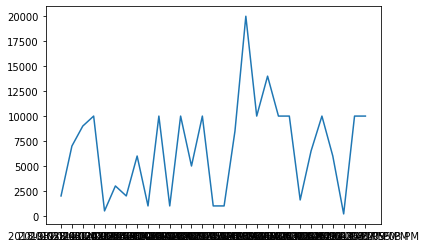

In [25]:
plt.plot(xs.apply(str), ys)

In [26]:
debit_filter = df['debit'] > 0
df[debit_filter]

,datetime,description,reference_no,debit,credit,balance
1,2018-08-27 08:18 AM,Buy Load transaction for 09975187259,0002103155009,75.0,NaN,5535.50
3,2018-08-27 05:12 PM,NaN,0002108470539,3000.0,NaN,2539.25
6,2018-08-28 03:46 PM,Buy Load transaction for 09975187259,0002117352036,100.0,NaN,2439.25
8,2018-08-28 08:04 PM,Transfer from 09975187259 to 09954645215,0002120186698,2000.0,NaN,8994.25
10,2018-08-29 10:47 AM,NaN,0002124217935,5900.0,NaN,3094.25
...,...,...,...,...,...,...
1916,2020-12-01 01:19 PM,Transfer from 09975187259 to 09278312071,7000645712453,2000.0,NaN,2459.94
1917,2020-12-04 06:17 PM,Transfer from 09975187259 to 09455002981,7000655991540,925.0,NaN,1534.94
1918,2020-12-06 12:49 AM,Buy Load Transaction for 09975187259,0000778906515,299.0,NaN,1235.94
1920,2020-12-07 07:33 AM,NaN,0000779138938,314.0,NaN,921.94


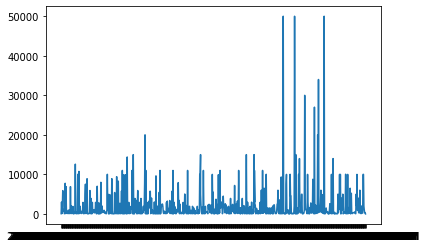

In [27]:
plt.plot(df[debit_filter]['datetime'], df[debit_filter]['debit'])

In [28]:
credit_filter = df['credit'] > 0
df[credit_filter]

,datetime,description,reference_no,debit,credit,balance
0,2018-08-27 08:18 AM,GCash Transaction with Ref.no. 2103158263,0002103158263,NaN,3.75,5539.25
5,2018-08-28 03:46 PM,GCash Transaction with Ref.no. 2117355991,0002117355991,NaN,5.00,2444.25
7,2018-08-28 08:00 PM,Transfer from 09954645215 to 09975187259,0002120133623,NaN,8550.00,10994.25
15,2018-09-03 05:06 PM,GCash Transaction with Ref.no.23384784,0000023384784,NaN,168.60,2634.85
16,2018-09-03 06:09 PM,GCash Transaction with Ref.no.21481129,0000021481129,NaN,31.40,2666.25
...,...,...,...,...,...,...
1899,2020-11-19 07:06 PM,Reversal,7000610475533,NaN,241.38,16172.91
1901,2020-11-19 11:16 PM,Reversal,7000611148833,NaN,241.38,16172.91
1905,2020-11-21 02:26 PM,NaN,023001707195494,NaN,3.50,16106.41
1912,2020-11-22 07:44 PM,Transfer from 09185583555 to 09975187259,3000619482629,NaN,2000.00,14459.94


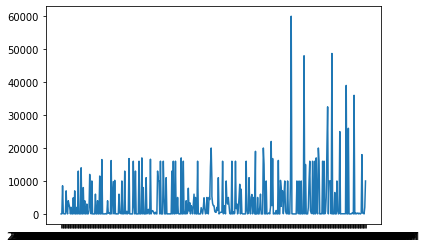

In [29]:
plt.plot(df[credit_filter]['datetime'].apply(str), df[credit_filter]['credit'])

In [30]:
balance_filter = df['balance'] > 0
df[balance_filter]

,datetime,description,reference_no,debit,credit,balance
0,2018-08-27 08:18 AM,GCash Transaction with Ref.no. 2103158263,0002103158263,NaN,3.75,5539.25
1,2018-08-27 08:18 AM,Buy Load transaction for 09975187259,0002103155009,75.0,NaN,5535.50
3,2018-08-27 05:12 PM,NaN,0002108470539,3000.0,NaN,2539.25
5,2018-08-28 03:46 PM,GCash Transaction with Ref.no. 2117355991,0002117355991,NaN,5.00,2444.25
6,2018-08-28 03:46 PM,Buy Load transaction for 09975187259,0002117352036,100.0,NaN,2439.25
...,...,...,...,...,...,...
1916,2020-12-01 01:19 PM,Transfer from 09975187259 to 09278312071,7000645712453,2000.0,NaN,2459.94
1917,2020-12-04 06:17 PM,Transfer from 09975187259 to 09455002981,7000655991540,925.0,NaN,1534.94
1918,2020-12-06 12:49 AM,Buy Load Transaction for 09975187259,0000778906515,299.0,NaN,1235.94
1920,2020-12-07 07:33 AM,NaN,0000779138938,314.0,NaN,921.94


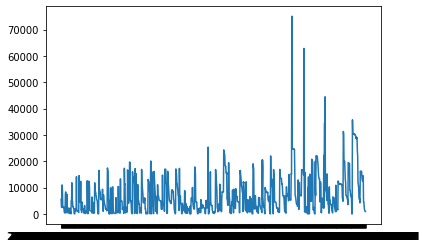

In [31]:
plt.plot(df[balance_filter]['datetime'].apply(str), df[balance_filter]['balance'])

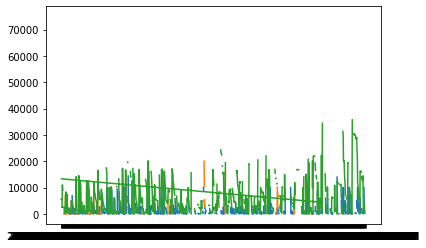

In [53]:
mgax= df['datetime'].apply(str)
plt.plot(mgax, df['debit'], mgax, df['credit'], mgax, df['balance'])